# For DeepFake

In [11]:
!pip install insightface
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 87.3 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055394 sha256=b1f51795f3038ba6e06706fc23af9aa2ecaa8176bd0fc35414dae7ab28c7978e
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [12]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [ ]:
print('insightface',insightface.__version__)

insightface 0.7.3


In [ ]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 66870.76KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx')


/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


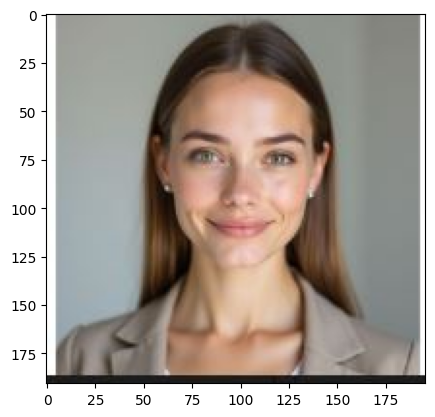

In [ ]:
input2 = cv2.imread('/input/input2.JPG')
plt.imshow(input2[:,:,::-1])
plt.show()

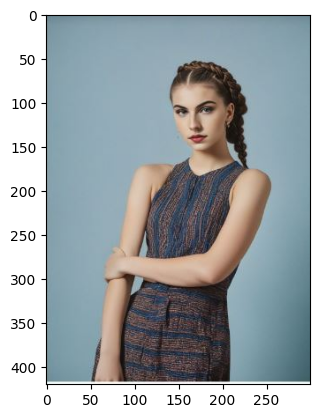

In [ ]:
input1 = cv2.imread('/input/input1.JPG')
plt.imshow(input1[:,:,::-1])
plt.show()

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


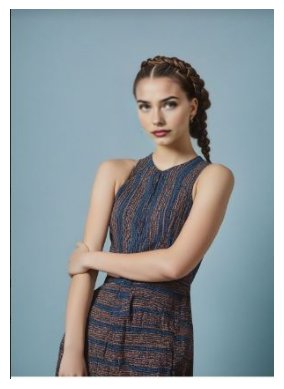

In [ ]:
faces = app.get(input1)
res = input1.copy()
input_face = app.get(input2)
input_face = input_face[0]
for face in faces:
  res = swapper.get(res,face,input_face,paste_back = True)

fig,ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')

plt.savefig('DeepFake_image.JPG', bbox_inches='tight', pad_inches=0)

plt.show()

# To Change Background

In [2]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.7 MB/s eta 0:00:00


In [3]:
from rembg import remove
from PIL import Image

In [4]:
img1_path = '/output/DeepFake_image.JPG'
img2_path = '/input/input3.JPG'

In [ ]:
img_name = 'DeepFake_image.JPG'
# Open the file in read binary ('rb') mode for reading the image data
with open(img1_path, 'rb') as f:
    input = f.read()

# Process the image using rembg
subject = remove(input)

new_img = 'DeepFake_with_no_background.JPG'
# Open the file in write binary ('wb') mode for writing the processed image data
with open('/output/'+new_img, 'wb') as f:
    f.write(subject)

In [7]:
img_path = '/output/DeepFake_with_no_background_image.JPG'
foreground_img = Image.open(img_path).convert("RGBA")
background_img = Image.open(img2_path).convert("RGBA")
background_img = background_img.resize(foreground_img.size)
background_img.paste(foreground_img, (0, 0), foreground_img)
background_img.save('DeepFake_with_background.PNG')

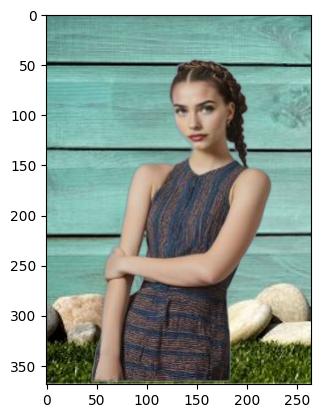

In [10]:
plt.imshow(background_img)